# November 16
Made BinaryDataClean3
The difference is how we do the isochrone fitting. We start by looking for an exact match, and then slowly expand our range of 'good' fits until we find something that works. Hopefully we just find one row that fits the isochrone table.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [57]:
%run BinaryDataClean3.py
Tables = BinaryDataClean3('/home/cody/Binary Search/2nd_Data_Set/mc_rgb_nocuts.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

In [58]:
AllAvg, AllVis, ISO = Tables.get_data()
AllVis = Tables.cuts(AllVis)
AllAvg = Tables.nvisits_cut(AllAvg,5)
AAS_RG = Tables.rg_cut(AllAvg)

In [59]:
AAS_RG_T = Tables.troup_fits(AAS_RG)
AAS_RG_T = Tables.troup_errors(AAS_RG_T)

In [60]:
AAS_RG_IT = Tables.iso_fit(AAS_RG_T,ISO)

Done with 0.000000
No good fits in 3 sigma of erros. Star 2M05140287-7214484, row 16
No good fits in 3 sigma of erros. Star 2M05205391-7259483, row 87
No good fits in 3 sigma of erros. Star 2M05214222-7227340, row 98
Done with 100.000000
No good fits in 3 sigma of erros. Star 2M05215411-7316058, row 103
No good fits in 3 sigma of erros. Star 2M05235220-7216056, row 124
Done with 200.000000
No good fits in 3 sigma of erros. Star 2M04570693-7129288, row 250
No good fits in 3 sigma of erros. Star 2M05010386-7102238, row 300
No good fits in 3 sigma of erros. Star 2M06261934-7011104, row 370
No good fits in 3 sigma of erros. Star 2M06281846-7008537, row 400
No good fits in 3 sigma of erros. Star 2M06320563-7050235, row 451
No good fits in 3 sigma of erros. Star 2M06354972-6957575, row 488
No good fits in 3 sigma of erros. Star 2M06390106-7040477, row 500
No good fits in 3 sigma of erros. Star 2M05185026-7556305, row 510
No good fits in 3 sigma of erros. Star 2M05221955-7617219, row 529
No g

In [61]:
AAS_RV_IT = Tables.rv_table_add(AAS_RG_IT, AllVis)
AllAvg_LMC_IT = Tables.mc_cut(AAS_RV_IT, 'L')
AllAvg_SMC_IT = Tables.mc_cut(AAS_RV_IT, 'S')

In [62]:
len(AAS_RG_T), len(AAS_RG_IT)

(1276, 1276)

(array([ 66.,  93., 266., 243., 187., 101.,  43.,  11.,   9.,   2.]),
 array([  0.        ,  19.78233809,  39.56467618,  59.34701426,
         79.12935235,  98.91169044, 118.69402853, 138.47636662,
        158.2587047 , 178.04104279, 197.82338088]),
 <a list of 10 Patch objects>)

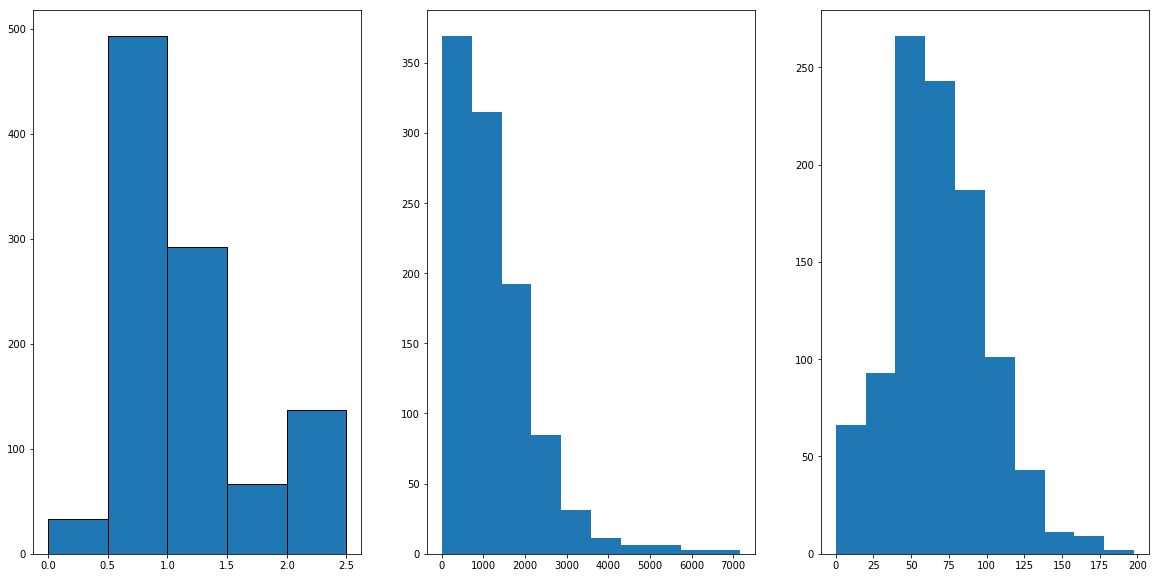

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))

ax1.hist(AllAvg_LMC_IT['ISO_MEANM'], bins = np.arange(0,3,0.5), edgecolor='black', align = 'mid')

ax2.hist(AllAvg_LMC_IT['ISO_MEANL'], )

ax3.hist(AllAvg_LMC_IT['ISO_MEANR'])

([array([ 34., 594., 219., 150.,  24.,   0.,   0.,   0.,   0.]),
  array([ 88., 228., 157., 110., 105., 109.,  56.,  38.,  27.])],
 array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 <a list of 2 Lists of Patches objects>)

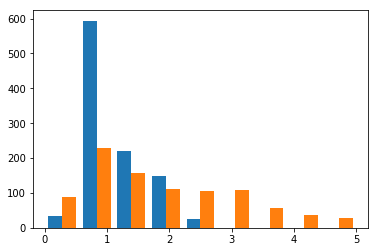

In [38]:
plt.hist([AllAvg_LMC_IT['ISO_MEANM'], AllAvg_LMC_IT['T_MASS']], bins = np.linspace(0,5,10))

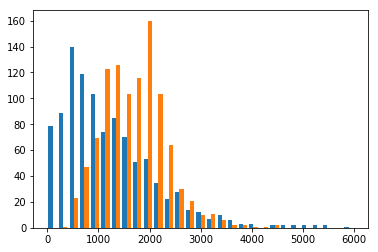

In [39]:
plt.hist([AllAvg_LMC_IT['ISO_MEANL'], AllAvg_LMC_IT['T_LUM']],bins = np.linspace(0, 6000, 30))
plt.show()

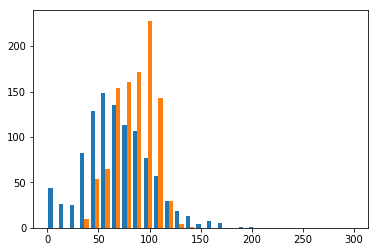

In [40]:
plt.hist([AllAvg_LMC_IT['ISO_MEANR'], AllAvg_LMC_IT['T_RADIUS']],bins = np.linspace(0, 300, 30))
plt.show()

Text(0.5, 1.0, 'RG Mass $M_{\\odot}$')

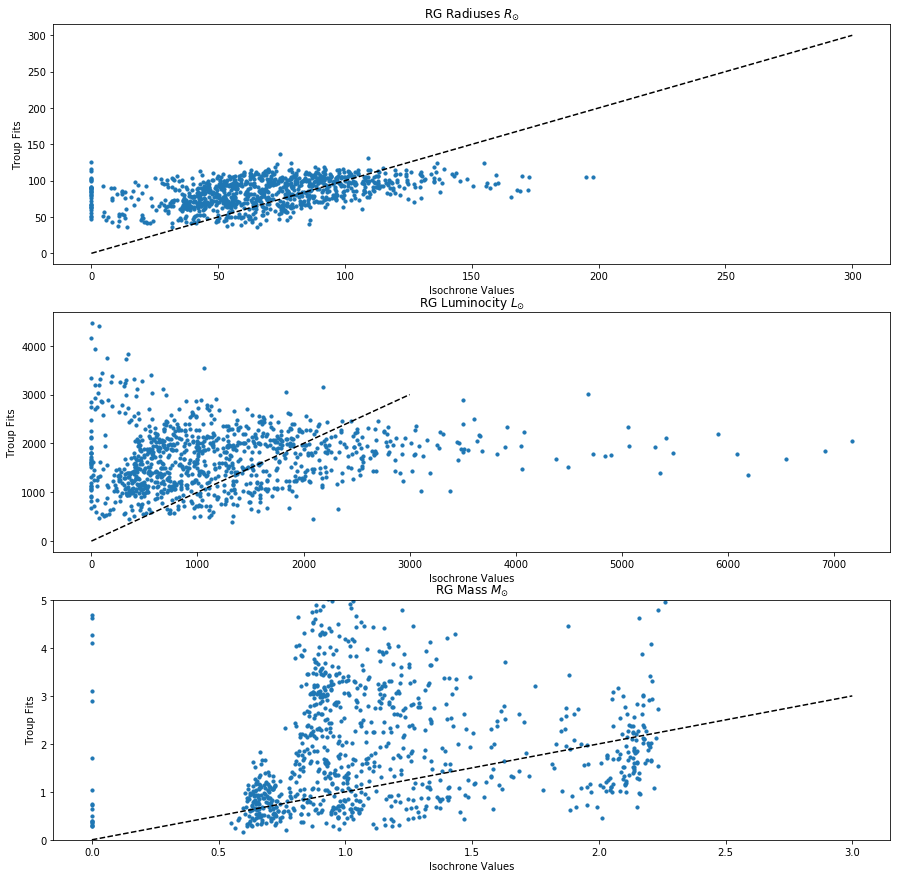

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15, 15))
ax1.scatter(AllAvg_LMC_IT['ISO_MEANR'], AllAvg_LMC_IT['T_RADIUS'], s = 10)
ax1.plot([0,300],[0,300],'--', color = 'black')
ax1.set_xlabel('Isochrone Values')
ax1.set_ylabel('Troup Fits')
ax1.set_title('RG Radiuses $R_{\odot}$')

ax2.scatter(AllAvg_LMC_IT['ISO_MEANL'], AllAvg_LMC_IT['T_LUM'], s = 10)
ax2.plot([0,3000],[0,3000],'--', color = 'black')
ax2.set_xlabel('Isochrone Values')
ax2.set_ylabel('Troup Fits')
ax2.set_title('RG Luminocity $L_{\odot}$')

ax3.scatter(AllAvg_LMC_IT['ISO_MEANM'], AllAvg_LMC_IT['T_MASS'], s = 10)
ax3.plot([0,3],[0,3],'--', color = 'black')
ax3.set_xlabel('Isochrone Values')
ax3.set_ylabel('Troup Fits')
ax3.set_ylim(0,5)
ax3.set_title('RG Mass $M_{\odot}$')

The points where the isochrone values are zero are when there were no good fits within 3 $\sigma$ of the errors

In [42]:
min(AllAvg_LMC_IT['ISO_MEANM'])

0.0

In [43]:
AllAvg_SMC=Tables.Table_Convert(AllAvg_SMC_IT)
AllAvg_LMC=Tables.Table_Convert(AllAvg_LMC_IT)

In [44]:
AllAvg_LMC = Tables.nvisits_cut(AllAvg_LMC,5)
AllAvg_SMC = Tables.nvisits_cut(AllAvg_SMC,5)

In [53]:
%run Binary_Fraction.py
thing_LMC = Binary_Fraction(AllAvg_LMC)
thing_SMC = Binary_Fraction(AllAvg_SMC)

In [54]:
#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]
real_data_LMC = thing_LMC.Real_Data_Fraction()
real_data_SMC = thing_SMC.Real_Data_Fraction()

#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]
synthetic_rates_LMC = thing_LMC.synthetic_detection_rate(500,'L',True,False,[0,1],10)
synthetic_rates_SMC = thing_SMC.synthetic_detection_rate(500,'L',True,False,[0,1],10)

You got stuck!
You got stuck!


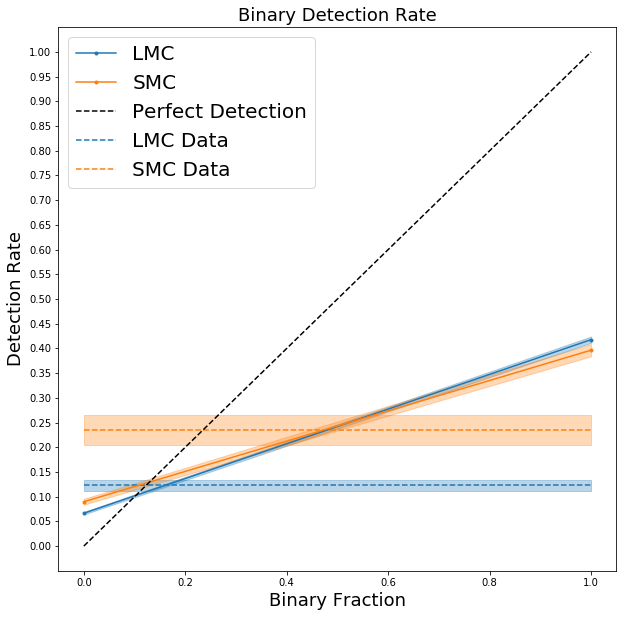

In [47]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, synthetic_rates_LMC[2],'.-', color = 'C0', label = 'LMC')
plt.hlines(real_data_LMC[2], 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_LMC[3][0][1], synthetic_rates_LMC[3][1][1]],
                 [synthetic_rates_LMC[3][0][0], synthetic_rates_LMC[3][1][0]],
                 alpha = 0.3, color = 'C0')
plt.fill_between([0,1], real_data_LMC[3][0][0], real_data_LMC[3][0][1], alpha = 0.3, color = 'C0')

#plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
#plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
#plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
#plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')
plt.plot(b_frac, synthetic_rates_SMC[2],'.-', color = 'C1', label = 'SMC')
plt.hlines(real_data_SMC[2], 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_SMC[3][0][1], synthetic_rates_SMC[3][1][1]],
                 [synthetic_rates_SMC[3][0][0], synthetic_rates_SMC[3][1][0]],
                 alpha = 0.3, color = 'C1')
plt.fill_between([0,1], real_data_SMC[3][0][0], real_data_SMC[3][0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')

#plt.text(0.91, 0.72, '{:2f}'.format(synthetic_rates_LMC[2][-1]))
#plt.text(0.91, 0.55, '{:2f}'.format(synthetic_rates_SMC[2][-1]))

plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.yticks(np.arange(0,1.05,.05))

plt.title('Binary Detection Rate', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

In [ ]:
iso_foo = ISO[ISO["AGE"] >= 1e9]
#iso_foo = iso_foo[iso_foo["AGE"] <= 10e9]
Table(iso_foo)

In [ ]:
Table(ISO)